# All About Perceptrons

### Importing Libs

In [25]:
#All the libs used in the code. Make sure they are installed before running the code.
import numpy as np
import matplotlib.pyplot as plt

## Percepton

### Defining Percepton Class

In [ ]:
class Perceptron:
    def __init__(self, input_size, lr=0.1, epochs=10, gate="and"):
        self.W = np.zeros(input_size + 1)
        self.lr = lr
        self.epochs = epochs
        self.accuracy_history = []
        self.loss_history = []
        self.gate = gate

        if gate == "and":
            self.X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
            self.y = np.array([0, 0, 0, 1])
        elif gate == "or":
            self.X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
            self.y = np.array([0, 1, 1, 1])
        else:
            raise ValueError("Unsupported gate type. Choose 'and' or 'or'.")

    def activation_fn(self, x):
        return 1 if x >= 0 else 0

    def predict(self, x):
        z = self.W.T.dot(x)
        return self.activation_fn(z)

    def fit(self):
        print("---------------Training Start----------------")

        X, d = self.X, self.y
        for epoch in range(self.epochs):
            total_loss = 0
            correct_predictions = 0
            for i in range(d.shape[0]):
                x = np.insert(X[i], 0, 1)
                y = self.predict(x)
                self.W = self.W + self.lr * (d[i] - y) * x
                total_loss += (d[i] - y) ** 2
                if y == d[i]:
                    correct_predictions += 1

            accuracy = correct_predictions / len(d)
            self.accuracy_history.append(accuracy)
            self.loss_history.append(total_loss)
            print(f"Epoch: {epoch + 1}, Loss: {total_loss}, Accuracy: {accuracy}")

        print("---------------Training Complete----------------")

    def plot_data(self, title):
        plt.figure()
        plt.scatter(self.X[:, 0], self.X[:, 1], c=self.y, cmap='bwr', marker='o')
        plt.title(f'{title} - Data Points for {self.gate.upper()} Gate')
        plt.xlabel('Input 1')
        plt.ylabel('Input 2')
        plt.colorbar(label='Class')
        plt.grid(True)
        plt.show()

    def plot_acc_loss(self, title):
        plt.figure()
        plt.subplot(2, 1, 1)
        plt.plot(self.accuracy_history, label='Accuracy')
        plt.title(f'{title} Accuracy and Loss for {self.gate.upper()} Gate')
        plt.ylabel('Accuracy')
        plt.grid(True)
        
        plt.subplot(2, 1, 2)
        plt.plot(self.loss_history, label='Loss', color='red')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.grid(True)
        
        plt.tight_layout()
        plt.show()

    def plot_expected_decision_boundary(self, title):
        plt.figure()
        x_min, x_max = self.X[:, 0].min() - 1, self.X[:, 0].max() + 1
        y_min, y_max = self.X[:, 1].min() - 1, self.X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
        
        if self.gate not in ["and", "or"]:
            raise ValueError("Invalid gate type. It must be 'and' or 'or'.")
        
        if self.gate == "or":
            Z = xx + yy - 1.5  
        elif self.gate == "and":
            Z = xx + yy - 0.5  
        
        Z = Z.reshape(xx.shape)
        
        plt.contourf(xx, yy, Z > 0, alpha=0.2, cmap='bwr', levels=[-1, 0, 1])
        plt.scatter(self.X[:, 0], self.X[:, 1], c=self.y, cmap='bwr', edgecolor='k')
        
        # Adjust labels and title
        plt.title(f'{title} Expected Decision Boundary for {self.gate.upper()} Gate')
        plt.xlabel('Input 1')
        plt.ylabel('Input 2')
        plt.grid(True)
        plt.show()
        
    def plot_actual_decision_boundary(self, title):
        plt.figure()
        x_min, x_max = self.X[:, 0].min() - 1, self.X[:, 0].max() + 1
        y_min, y_max = self.X[:, 1].min() - 1, self.X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
        Z = np.array([self.predict(np.insert(np.array([x, y]), 0, 1)) for x, y in zip(xx.ravel(), yy.ravel())])
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, alpha=0.2, cmap='bwr')
        plt.scatter(self.X[:, 0], self.X[:, 1], c=self.y, cmap='bwr', edgecolor='k')
        plt.title(f'{title} Actual Decision Boundary for {self.gate.upper()} Gate')
        plt.xlabel('Input 1')
        plt.ylabel('Input 2')
        plt.grid(True)
        plt.show()

### AND gate data and expected fit line

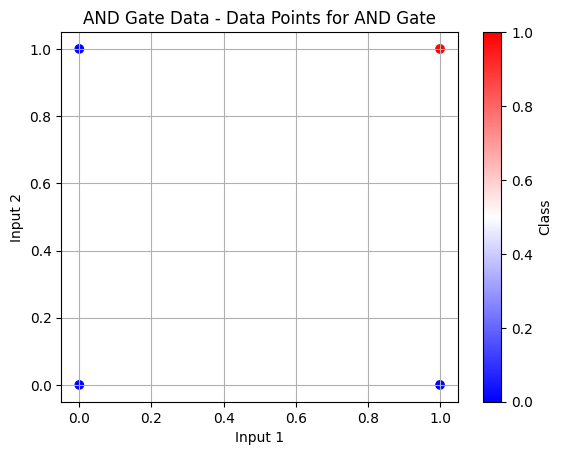

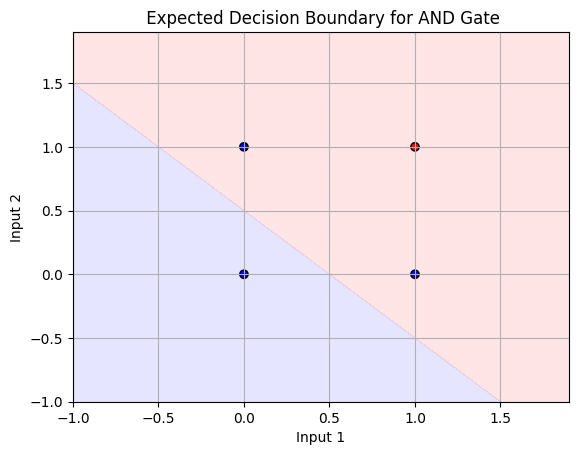

In [27]:
p_and = Perceptron(input_size=2, gate="and")
p_and.plot_data(title="AND Gate Data")
p_and.plot_expected_decision_boundary("")

### Training the Perceptron model to predict AND gate output

In [28]:
p_and.fit()


---------------Training Start----------------
Epoch: 1, Loss: 2, Accuracy: 0.5
Epoch: 2, Loss: 3, Accuracy: 0.25
Epoch: 3, Loss: 3, Accuracy: 0.25
Epoch: 4, Loss: 0, Accuracy: 1.0
Epoch: 5, Loss: 0, Accuracy: 1.0
Epoch: 6, Loss: 0, Accuracy: 1.0
Epoch: 7, Loss: 0, Accuracy: 1.0
Epoch: 8, Loss: 0, Accuracy: 1.0
Epoch: 9, Loss: 0, Accuracy: 1.0
Epoch: 10, Loss: 0, Accuracy: 1.0
---------------Training Complete----------------


### Plotting the results

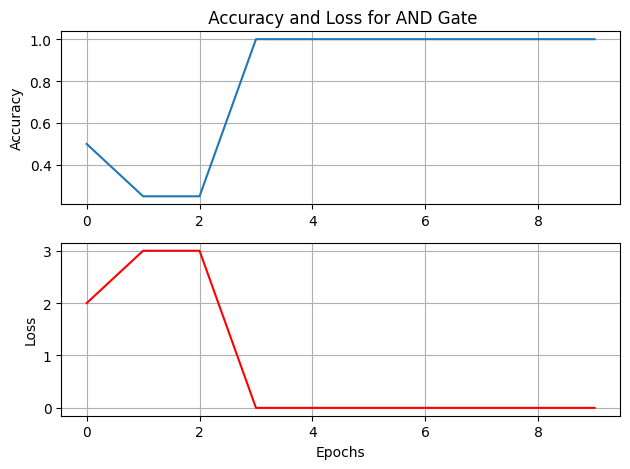

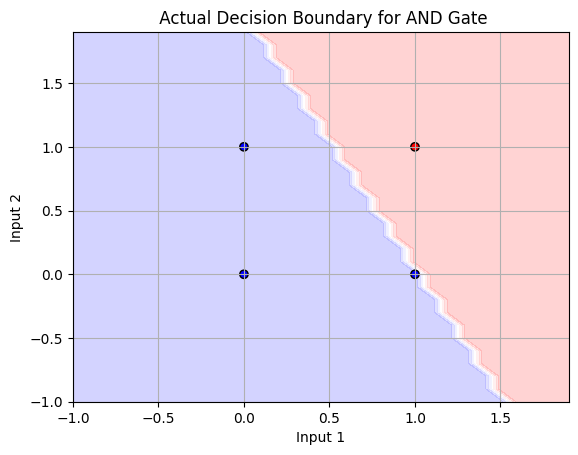

In [29]:
p_and.plot_acc_loss("")
p_and.plot_actual_decision_boundary("")

### OR gate data and expected fit line

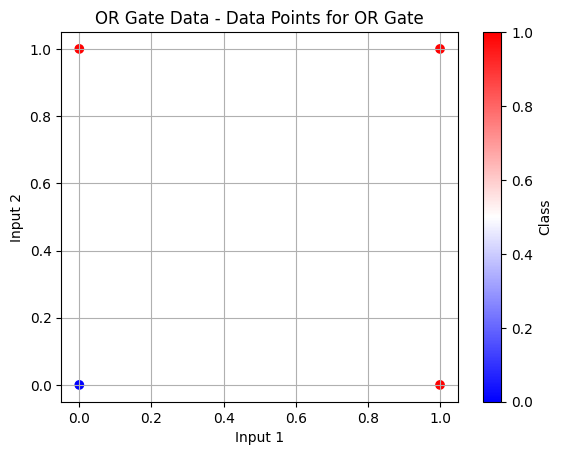

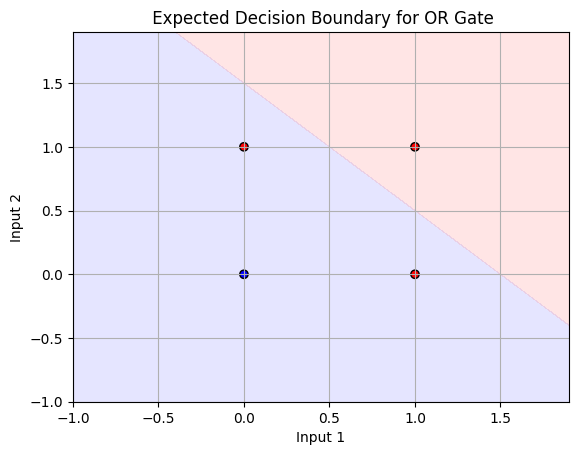

In [30]:
p_or = Perceptron(input_size=2, gate="or")
p_or.plot_data(title="OR Gate Data")
p_or.plot_expected_decision_boundary(title="")

### Training the Perceptron model to predict OR gate output

In [31]:
p_or.fit()

---------------Training Start----------------
Epoch: 1, Loss: 2, Accuracy: 0.5
Epoch: 2, Loss: 2, Accuracy: 0.5
Epoch: 3, Loss: 1, Accuracy: 0.75
Epoch: 4, Loss: 0, Accuracy: 1.0
Epoch: 5, Loss: 0, Accuracy: 1.0
Epoch: 6, Loss: 0, Accuracy: 1.0
Epoch: 7, Loss: 0, Accuracy: 1.0
Epoch: 8, Loss: 0, Accuracy: 1.0
Epoch: 9, Loss: 0, Accuracy: 1.0
Epoch: 10, Loss: 0, Accuracy: 1.0
---------------Training Complete----------------


### Plotting the results

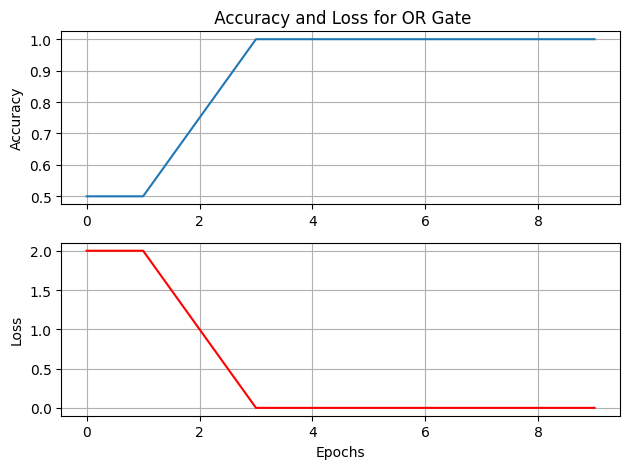

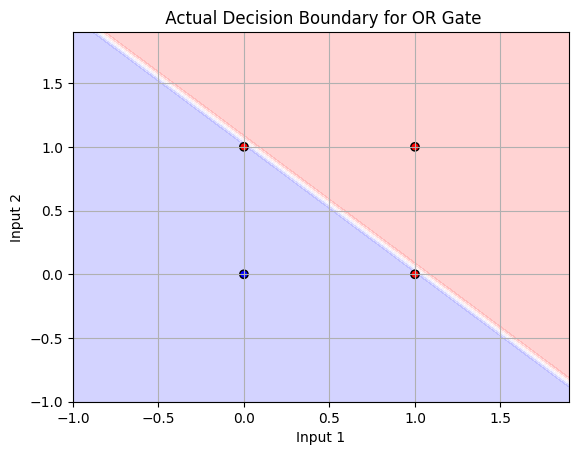

In [32]:
p_or.plot_acc_loss("")
p_or.plot_actual_decision_boundary("")

## Multi Layered Perceptron

### Defining Multi Layered Percepton Class

In [33]:
class MLP:
    def __init__(self, input_size, hidden_size, lr=0.1, epochs=10):
        self.W1 = np.random.randn(input_size + 1, hidden_size)
        self.W2 = np.random.randn(hidden_size + 1, 1)
        self.lr = lr
        self.epochs = epochs
        self.accuracy_history = []
        self.loss_history = []
        self.X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
        self.y = np.array([0, 1, 1, 0])
    
    def activation_fn(self, x):
        return 1 / (1 + np.exp(-x))

    def activation_fn_derivative(self, x):
        return x * (1 - x)

    def predict(self, X):
        X = np.insert(X, 0, 1)
        self.Z1 = self.activation_fn(np.dot(X, self.W1))
        self.Z1 = np.insert(self.Z1, 0, 1)
        self.Z2 = self.activation_fn(np.dot(self.Z1, self.W2))
        return self.Z2

    def fit(self):
        print("---------------Training Start----------------")
        for epoch in range(self.epochs):
            total_loss = 0
            correct_predictions = 0
            for i in range(self.X.shape[0]):
                X_input = np.insert(self.X[i], 0, 1)
                y_true = self.y[i]
                y_pred = self.predict(self.X[i])
                error = y_true - y_pred
                total_loss += error**2
                dZ2 = error * self.activation_fn_derivative(y_pred)
                dW2 = self.lr * dZ2 * self.Z1
                dZ1 = dZ2.dot(self.W2[1:].T) * self.activation_fn_derivative(self.Z1[1:])
                dW1 = self.lr * np.outer(X_input, dZ1)
                self.W2 += dW2.reshape(-1, 1)
                self.W1 += dW1
                if np.round(y_pred) == y_true:
                    correct_predictions += 1
            
            accuracy = correct_predictions / len(self.y)
            self.accuracy_history.append(accuracy)
            self.loss_history.append(total_loss)
            print(f"Epoch: {epoch + 1}, Loss: {total_loss}, Accuracy: {accuracy}")

        print("---------------Training Complete----------------")

    def plot_accuracy_loss(self):
        self._plot_metric(np.arange(1, self.epochs + 1), self.accuracy_history, 'Epoch', 'Accuracy', 'Accuracy over Epochs')
        self._plot_metric(np.arange(1, self.epochs + 1), self.loss_history, 'Epoch', 'Loss', 'Loss over Epochs')

    def _plot_metric(self, x, y, xlabel, ylabel, title):
        plt.plot(x, y)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.title(title)
        plt.grid(True)
        plt.show()

    def plot_data(self, title=""):
        X, y = self.X, self.y
        self._plot_points(X, y)
        self._finalize_plot(title)

    def _plot_points(self, X, y):
        for i, point in enumerate(X):
            color, marker, label = ('red', 'o', '0') if y[i] == 0 else ('blue', 'x', '1')
            plt.scatter(point[0], point[1], color=color, marker=marker, label=label if i == 0 else "")

    def _finalize_plot(self, title):
        plt.title(title)
        plt.xlim(-0.1, 1.5)
        plt.ylim(-0.1, 1.5)
        plt.xlabel('x1')
        plt.ylabel('x2')
        plt.legend(loc='best')
        plt.grid(True)
        plt.show()

    def plot_expected_decision_boundary(self, title="Expected XOR Decision Boundary"):
        x_min, x_max = self.X[:, 0].min() - 0.5, self.X[:, 0].max() + 0.5
        y_min, y_max = self.X[:, 1].min() - 0.5, self.X[:, 1].max() + 0.5
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                            np.arange(y_min, y_max, 0.01))
        Z = np.array([1 if (x > 0.5) != (y > 0.5) else 0 for x, y in np.c_[xx.ravel(), yy.ravel()]])
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Spectral, levels=[0, 0.5, 1])
        plt.contour(xx, yy, Z, colors='k', levels=[0.5], linestyles='--')
        self._plot_points(self.X, self.y)
        plt.title(title)
        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())
        plt.show()


    def plot_actual_decision_boundary(self, title="Actual Decision Boundary"):
        x_min, x_max = self.X[:, 0].min() - 0.5, self.X[:, 0].max() + 0.5
        y_min, y_max = self.X[:, 1].min() - 0.5, self.X[:, 1].max() + 0.5
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                            np.arange(y_min, y_max, 0.01))
        Z = np.array([self.predict(np.array([x, y])) for x, y in np.c_[xx.ravel(), yy.ravel()]])
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Spectral)
        self._plot_points(self.X, self.y)
        plt.title(title)
        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())
        plt.show()




### XOR gate data and expected fit

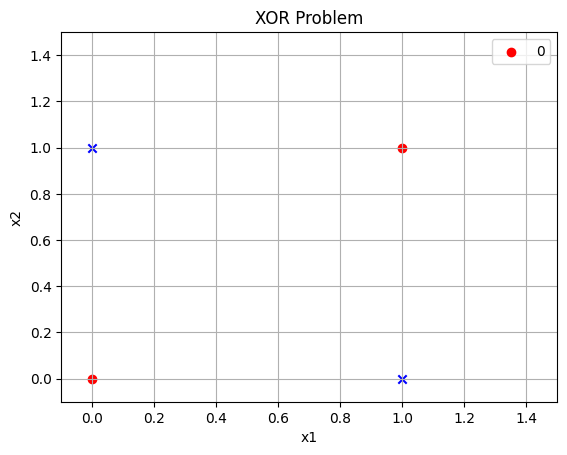

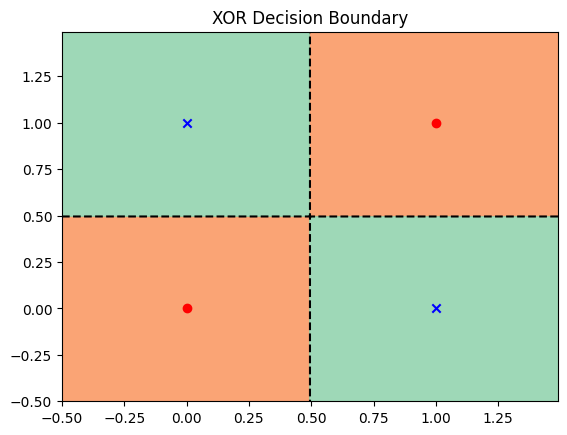

In [34]:
mlp = MLP(input_size=2, hidden_size=2, lr=0.1, epochs=5000)
mlp.plot_data(title="XOR Problem")
mlp.plot_expected_decision_boundary(title="XOR Decision Boundary")

### Training the Perceptron model to predict XOR gate output

In [35]:
mlp.fit()

---------------Training Start----------------
Epoch: 1, Loss: [1.09546712], Accuracy: 0.5
Epoch: 2, Loss: [1.09128058], Accuracy: 0.5
Epoch: 3, Loss: [1.08729947], Accuracy: 0.5
Epoch: 4, Loss: [1.08351689], Accuracy: 0.5
Epoch: 5, Loss: [1.0799258], Accuracy: 0.5
Epoch: 6, Loss: [1.07651905], Accuracy: 0.5
Epoch: 7, Loss: [1.07328944], Accuracy: 0.5
Epoch: 8, Loss: [1.07022975], Accuracy: 0.5
Epoch: 9, Loss: [1.06733281], Accuracy: 0.5
Epoch: 10, Loss: [1.0645915], Accuracy: 0.5
Epoch: 11, Loss: [1.06199879], Accuracy: 0.5
Epoch: 12, Loss: [1.05954779], Accuracy: 0.5
Epoch: 13, Loss: [1.05723175], Accuracy: 0.5
Epoch: 14, Loss: [1.05504407], Accuracy: 0.5
Epoch: 15, Loss: [1.05297835], Accuracy: 0.5
Epoch: 16, Loss: [1.05102838], Accuracy: 0.5
Epoch: 17, Loss: [1.04918816], Accuracy: 0.75
Epoch: 18, Loss: [1.04745189], Accuracy: 0.75
Epoch: 19, Loss: [1.04581399], Accuracy: 0.75
Epoch: 20, Loss: [1.04426911], Accuracy: 0.75
Epoch: 21, Loss: [1.04281211], Accuracy: 0.75
Epoch: 22, Loss

### Plotting the results

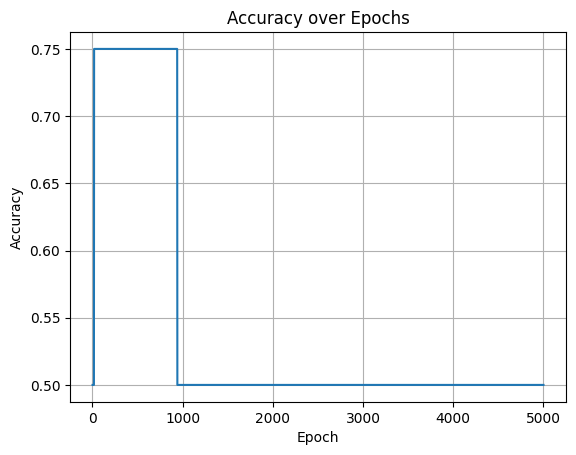

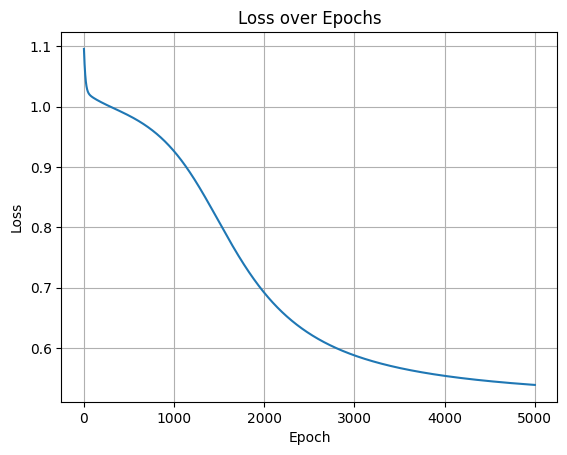

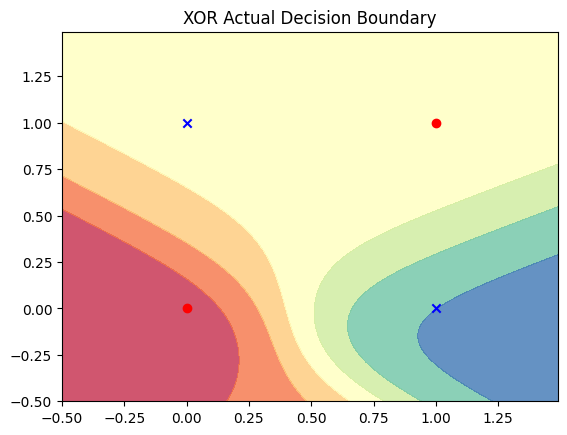

In [36]:
mlp.plot_accuracy_loss()
mlp.plot_actual_decision_boundary(title="XOR Actual Decision Boundary")